<a href="https://colab.research.google.com/github/Ommmmi/Data-Analysis-/blob/main/youtube_channel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the dataset
file_path = "/content/youtube_channel_real_performance_analytics (1).csv"
data = pd.read_csv(file_path)
print(data)

      ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0      0           201.0  2016-06-02 00:00:00                   0    2      6   
1      1           391.0  2016-06-10 00:00:00                   8   10      6   
2      2           133.0  2016-06-14 00:00:00                   4   14      6   
3      3            14.0  2016-06-29 00:00:00                  15   29      6   
4      4            45.0  2016-07-01 00:00:00                   2    1      7   
..   ...             ...                  ...                 ...  ...    ...   
359  359           779.0  2024-08-25 00:00:00                  10   25      8   
360  360           818.0  2024-09-01 00:00:00                   7    1      9   
361  361          2233.0  2024-09-16 00:00:00                  15   16      9   
362  362           391.0  2024-09-25 00:00:00                   9   25      9   
363  363          1875.0  2024-10-18 00:00:00                  23   18     10   

     Year Day of Week  Reve

In [ ]:
# Convert 'Video Publish Time' to datetime format
data['Video Publish Time'] = pd.to_datetime(data['Video Publish Time'])
data["Video Publish Time"]

,Video Publish Time
0,2016-06-02
1,2016-06-10
2,2016-06-14
3,2016-06-29
4,2016-07-01
...,...
359,2024-08-25
360,2024-09-01
361,2024-09-16
362,2024-09-25


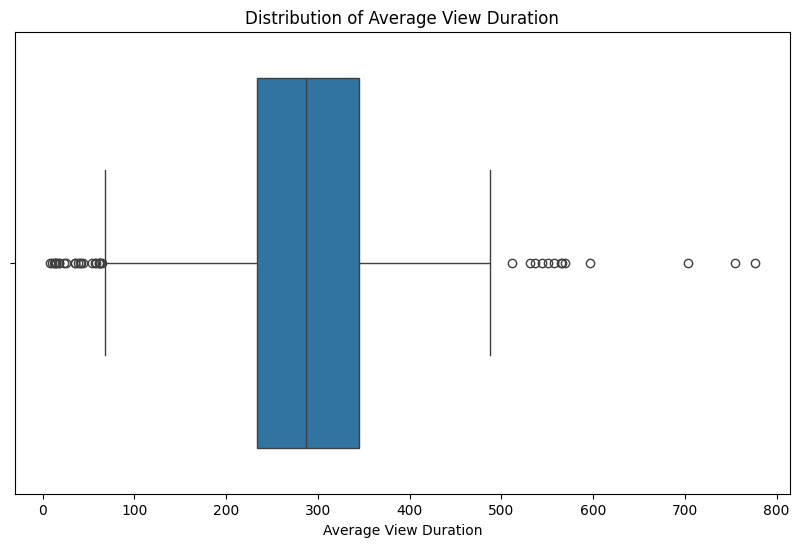

In [ ]:
# Analyze viewer retention
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Average View Duration', data=data)
plt.title('Distribution of Average View Duration')
plt.show()

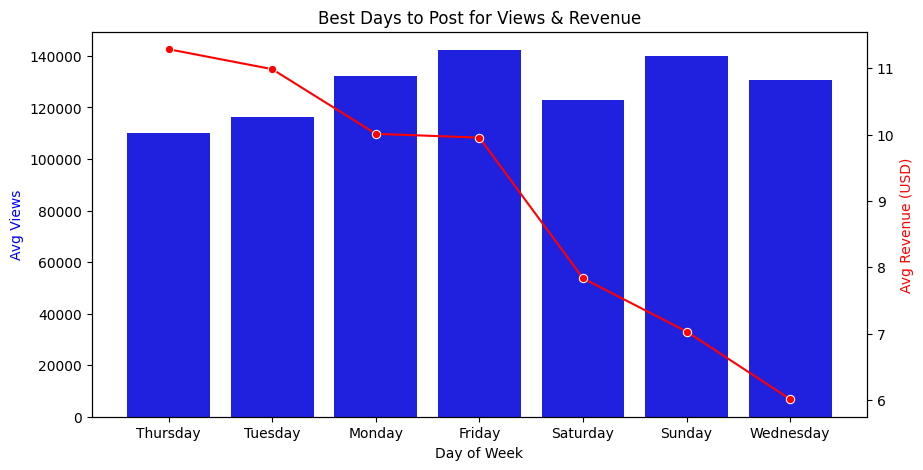

In [ ]:
# Best Days to Post for Engagement & Revenue
daywise_data = data.groupby("Day of Week")[["Views", "Estimated Revenue (USD)"]].mean().sort_values("Estimated Revenue (USD)", ascending=False)
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.barplot(x=daywise_data.index, y=daywise_data["Views"], color="blue", ax=ax1)
ax1.set_ylabel("Avg Views", color="blue")
ax2 = ax1.twinx()
sns.lineplot(x=daywise_data.index, y=daywise_data["Estimated Revenue (USD)"], color="red", marker="o", ax=ax2)
ax2.set_ylabel("Avg Revenue (USD)", color="red")
plt.title("Best Days to Post for Views & Revenue")
plt.show()


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               ID  Video Duration             Video Publish Time  \
count  364.000000      364.000000                            364   
mean   181.500000      664.239011  2019-03-31 17:52:05.274725376   
min      0.000000        9.000000            2016-06-02 00:00:00   
25%     90.750000      496.000000            2017-06-02 12:00:00   
50%    181.500000      613.000000            2018-01-28 00:00:00   
75%    272.250000      786.500000            2021-02-19 12:00:00   
max    363.000000     2311.000000            2024-10-18 00:00:00   
std    105.221988      330.646183                            NaN   

       Days Since Publish         Day       Month         Year  \
count          364.000000  364.000000  364.000000   364.000000   
mean             8.406593   15.807692    6.642857  2018.736264   
min              0.000000    1.000000    1.000000  2016.000000   
25%              3.000000    8.000000    4.000000  2017.000000   
50%              5.000000   16.00000

In [ ]:
# mean views
mean_views = df['Views'].mean()
print(f"Mean Views: {mean_views}")

Mean Views: 128800.10164835164


In [ ]:
#mean Renvenue
mean_revenue = df['Estimated Revenue (USD)'].mean()
print(f"Mean Revenue: {mean_revenue}")

Mean Revenue: 8.852052197802198


In [ ]:
#MAX views
max_views = df['Views'].max()
print(f"Max Views: {max_views}")

Max Views: 670990.0


In [ ]:
#max Revenue
max_revenue = df['Estimated Revenue (USD)'].max()
print(f"Max Revenue: {max_revenue}")

Max Revenue: 103.117


In [ ]:
# Correlation Heatmap
corr_matrix = data.corr(numeric_only=True)
fig = px.imshow(corr_matrix, color_continuous_scale='RdBu_r', title="Correlation Heatmap")
fig.show()

In [ ]:
# Engagement Analysis: Video Duration vs Views, Likes, Shares, Comments
fig = px.scatter(data, x='Video Duration', y='Views', title='Video Duration vs Views', opacity=0.7)
fig.update_layout(width=800, height=500)
fig.show()
fig = px.scatter(data, x='Video Duration', y='Likes', title='Video Duration vs Likes', opacity=0.7)
fig.update_layout(width=800, height=500)
fig.show()
fig = px.scatter(data, x='Video Duration', y='Shares', title='Video Duration vs Shares', opacity=0.7)
fig.update_layout(width=800, height=500)
fig.show()
fig = px.scatter(data, x='Video Duration', y='New Comments', title='Video Duration vs Comments', opacity=0.7)
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
# Viewer Retention Analysis
fig = px.scatter(data, x='Average View Duration', y='Views', title='Average View Duration vs Views', opacity=0.7)
fig.update_layout(width=800, height=500)
fig.show()
fig = px.scatter(data, x='Average View Percentage (%)', y='Views', title='Average View Percentage vs Views', opacity=0.7)
fig.update_layout(width=800, height=500)
fig.show()


In [ ]:
# Thumbnail CTR Impact
fig = px.scatter(data, x='Video Thumbnail CTR (%)', y='Views', title='Thumbnail CTR vs Views', opacity=0.7)
fig.show()
fig = px.scatter(data, x='Video Thumbnail CTR (%)', y='Estimated Revenue (USD)', title='Thumbnail CTR vs Revenue', opacity=0.7)
fig.show()

In [ ]:
# Revenue Breakdown
fig = px.scatter(data, x='Estimated AdSense Revenue (USD)', y='Estimated Revenue (USD)', title='AdSense Revenue vs Total Revenue', opacity=0.7)
fig.update_layout(width=800, height=500)
fig.show()
fig = px.scatter(data, x='DoubleClick Revenue (USD)', y='Estimated Revenue (USD)', title='DoubleClick Revenue vs Total Revenue', opacity=0.7)
fig.update_layout(width=800, height=500)
fig.show()
fig = px.scatter(data, x='YouTube\u00a0Premium (USD)', y='Estimated Revenue (USD)', title='YouTube Premium Revenue vs Total Revenue', opacity=0.7)
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
# Predictive Model: Revenue Estimation
features = ["Views", "Subscribers", "Likes", "Shares", "New Comments", "Playback-Based CPM (USD)", "Revenue per 1000 Views (USD)"]
target = "Estimated Revenue (USD)"
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 5.56
R-squared: 0.94


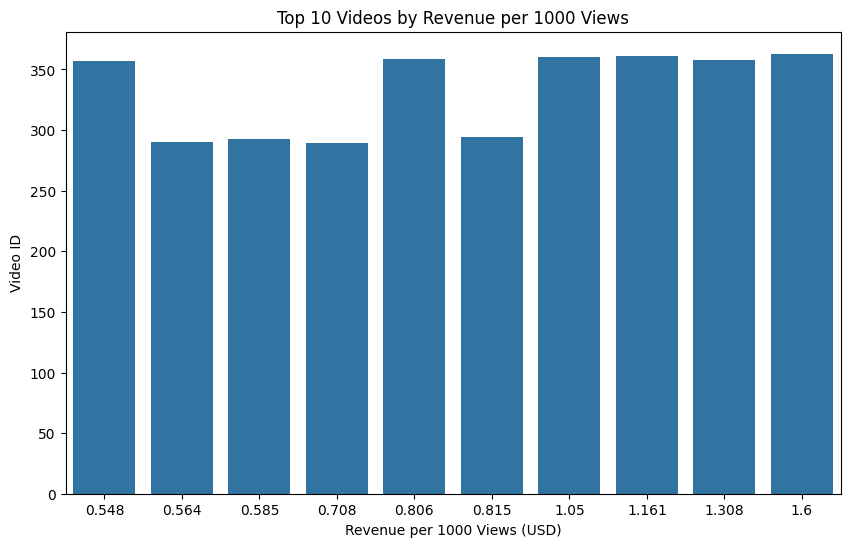

Most Profitable Videos:
       ID  Estimated Revenue (USD)
228  228                  103.117
257  257                   83.979
251  251                   80.265
289  289                   70.247
278  278                   65.978
260  260                   62.047
293  293                   59.058
294  294                   55.040
290  290                   50.344
284  284                   44.228
Total Revenue Sources:
 Estimated AdSense Revenue (USD)    2843.395
DoubleClick Revenue (USD)           231.407
YouTube Ads Revenue (USD)          5592.483
dtype: float64


In [ ]:
# Evaluate revenue drivers
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue per 1000 Views (USD)', y='ID', data=data.sort_values(by='Revenue per 1000 Views (USD)', ascending=False).head(10))
plt.title('Top 10 Videos by Revenue per 1000 Views')
plt.xlabel('Revenue per 1000 Views (USD)')
plt.ylabel('Video ID')
plt.show()

# Identify most profitable videos
profitable_videos = data.nlargest(10, 'Estimated Revenue (USD)')
# Check for the existence of the columns before printing
columns_to_print = ['ID', 'Estimated Revenue (USD)', 'Monetized Playbacks', 'CPM', 'YouTube Premium Revenue']
available_columns = [col for col in columns_to_print if col in profitable_videos.columns]
print("Most Profitable Videos:\n", profitable_videos[available_columns])

# Compare revenue sources
revenue_sources = data[['Estimated AdSense Revenue (USD)', 'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)']].sum()
print("Total Revenue Sources:\n", revenue_sources)

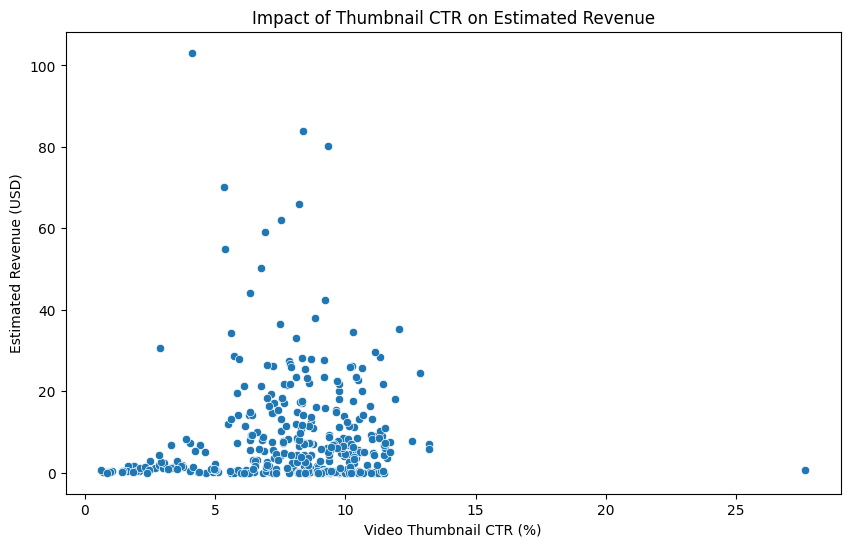

In [ ]:
# Impact of video thumbnails (CTR%) on performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Video Thumbnail CTR (%)', y='Estimated Revenue (USD)', data=data)
plt.title('Impact of Thumbnail CTR on Estimated Revenue')
plt.xlabel('Video Thumbnail CTR (%)')
plt.ylabel('Estimated Revenue (USD)')
plt.show()

<ipython-input-25-32f0a68a6276>:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



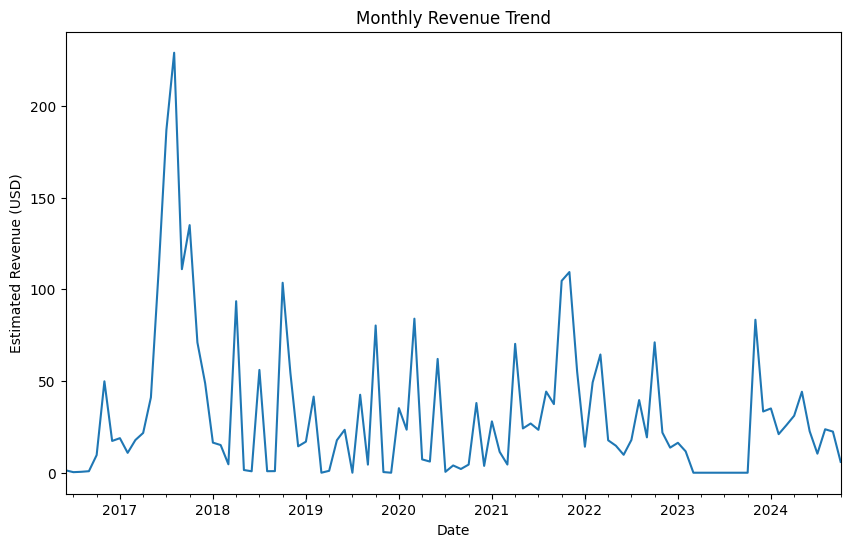

Mean Squared Error: 56.91


In [ ]:
# Time-series analysis for engagement and revenue
data = data.reset_index()

data.set_index('Video Publish Time', inplace=True)
monthly_revenue = data['Estimated Revenue (USD)'].resample('M').sum()
plt.figure(figsize=(10, 6))
monthly_revenue.plot()
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Estimated Revenue (USD)')
plt.show()


# Apply regression techniques
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data for modeling
features = data[['Views', 'Likes', 'Shares', 'New Comments']]
target = data['Estimated Revenue (USD)']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

In [ ]:
# Generate heatmaps, bar charts, line plots, and box plots
# (Already included in previous sections)

# Create an interactive dashboard using Plotly (example)
import plotly.express as px

fig = px.scatter(data, x='Views', y='Estimated Revenue (USD)', color='Day of Week', title='Views vs Estimated Revenue')
fig.show()

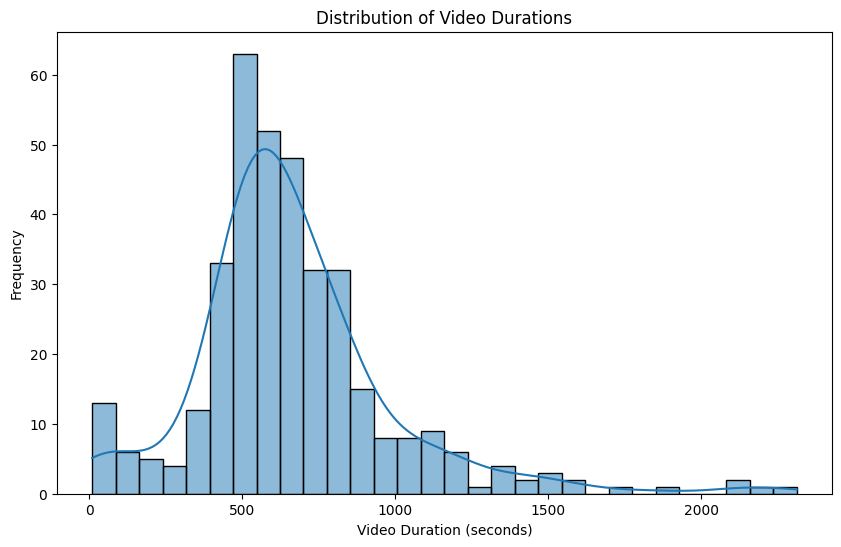

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Video Duration'], bins=30, kde=True)
plt.title('Distribution of Video Durations')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.show()